In [7]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from gpp.vae_modified_architecture import ConvVAE
import zipfile
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # can just override for multi-gpu systems
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)


In [8]:
# Hyperparameters for ConvVAE
z_size = 8
batch_size = 128
learning_rate = 0.001
kl_tolerance = 0.5

# Parameters for training
NUM_EPOCH = 500
DATA_DIR = "record"
IMG_OUTPUT_DIR = './out'

model_save_path = "tf_vae"
os.makedirs(model_save_path, exist_ok=True)
os.makedirs(IMG_OUTPUT_DIR, exist_ok=True)


In [10]:

data_path = "../data"
print(os.getcwd())
if not os.path.exists(os.path.join(data_path, "pendulum_imgs.npy")):
    zip_ref = zipfile.ZipFile("../data/pendulum_imgs.npy.zip", 'r')
    zip_ref.extractall(data_path)
    zip_ref.close()
dataset = np.load("../data/pendulum_imgs.npy")
np.random.shuffle(dataset)
dataset = dataset / 255.
dataset = dataset[:, 60:190, 60:190]
new_data = []
for i, d in enumerate(dataset):
    new_data.append(cv2.resize(d, (32, 32), interpolation=cv2.INTER_AREA))
dataset = np.array(new_data)
train_ratio = int(0.8 * len(dataset))
x_train = dataset[:train_ratio]
x_test = dataset[train_ratio:]

total_length = len(x_train)
num_batches = int(np.floor(total_length / batch_size))
print("num_batches", num_batches)


/Users/eysteinngunnlaugsson/School/dsproject/project/generative-parametrizations/scripts
num_batches 6


In [12]:
vae = ConvVAE(z_size=z_size,
              batch_size=batch_size,
              learning_rate=learning_rate,
              kl_tolerance=kl_tolerance,
              is_training=True,
              reuse=False,
              gpu_mode=False,
              )
vae.load_json()


INFO:tensorflow:Model using cpux.
[None, 16, 16, 16]
[None, 8, 8, 32]
[None, 4, 4, 64]
[None, 1024]
[128, 1, 1, 64]
[128, 4, 4, 64]
[128, 8, 8, 32]
[128, 16, 16, 16]
[128, 32, 32, 3]


<IPython.core.display.Javascript object>


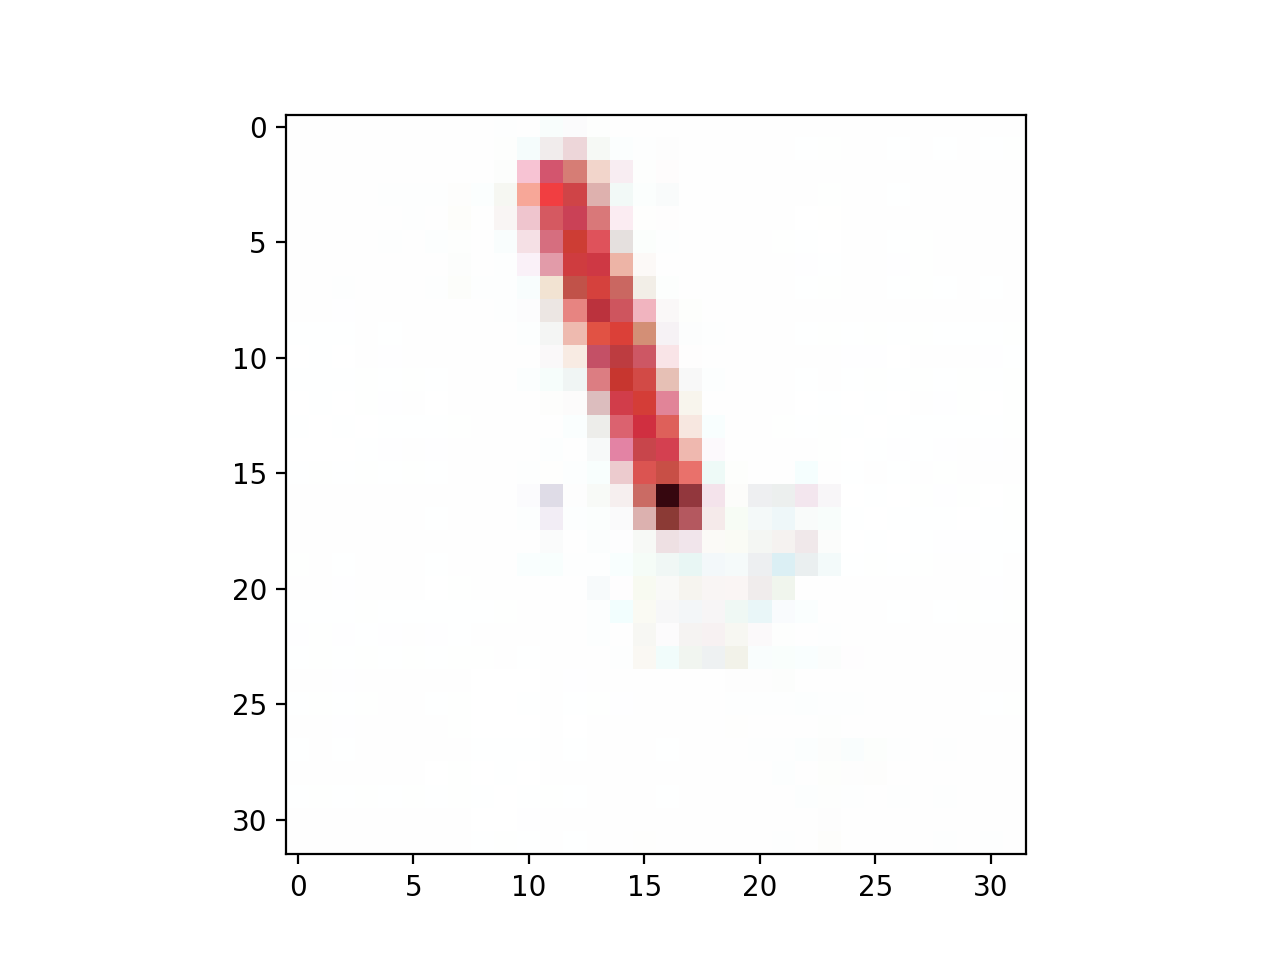

interactive(children=(FloatSlider(value=-2.725459575653076, description='w1', max=2.2041900157928467, min=-4.5…

<function __main__.update(w1=1.0, w2=1.0, w3=1.0, w4=1.0, w5=1.0, w6=1.0, w7=1.0, w8=1.0)>

In [59]:
z = vae.encode(x_test[:batch_size])
reconstruct = vae.decode(batch_z)
pic = reconstruct[0]

fig, ax = plt.subplots()
im = ax.imshow(pic)


def update(w1=1.0, w2=1.0, w3=1.0, w4=1.0, w5=1.0, w6=1.0, w7=1.0, w8=1.0):
    weights = np.array([w1, w2, w3, w4, w5, w6, w7, w8])
    z[0] = weights
    reconstruct = vae.decode(z)
    im = ax.imshow(reconstruct[0])
    
# freq = widgets.FloatSlider(value=7.5, min=1, max=5.0, step=0.5)
maxes = z.max(axis=0)
mins = z.min(axis=0)
interact(update, 
         w1= widgets.FloatSlider(value=z[0][0], min=mins[0], max=maxes[0],step=0.1), 
         w2=widgets.FloatSlider(value=z[0][1], min=mins[1], max=maxes[1], step=0.1), 
         w3=widgets.FloatSlider(value=z[0][2], min=mins[2], max=maxes[2], step=0.1), 
         w4=widgets.FloatSlider(value=z[0][3], min=mins[3], max=maxes[3], step=0.1), 
         w5=widgets.FloatSlider(value=z[0][4], min=mins[4], max=maxes[4], step=0.1), 
         w6=widgets.FloatSlider(value=z[0][5], min=mins[5], max=maxes[5], step=0.1), 
         w7=widgets.FloatSlider(value=z[0][6], min=mins[6], max=maxes[6], step=0.1), 
         w8=widgets.FloatSlider(value=z[0][7], min=mins[7], max=maxes[7], step=0.1), 
        )


In [58]:
print(z[1])

[-1.9311 -1.6403  4.3685  0.9552 -0.2788  5.3747 -1.2125 -0.8575]


In [ ]:
print(123)